## Electron Spectrum in Momentum space

A trial of electron spectrum!


In [1]:
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates.sky_coordinate import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
from astropy import constants as const
from astropy.wcs import WCS
from ClusterModel import model
from ClusterModel import model_modpar
from ClusterModel import model_tools

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster(name='Coma', 
                      redshift=0.023, M500=7e14*u.Msun, 
                      cosmology=cosmo, silent=False, 
                      output_dir='/home/astrogamma/Project/Output/TestClusterModel')


                 __  __ ___ ___   _   ___   ___                 
                |  \/  |_ _/ __| /_\ |   \ / _ \                
                | |\/| || | (__ / _ \| |) | (_) |               
                |_|  |_|___\___/_/ \_\___/ \___/                
 Modeling the Intra Cluster Atmosphere for Diverse Observations 
----------------------------------------------------------------
                                                                
Setting gNFW Planck coll. (2013) UPP.


## Set the spectrum model as the momentum space power law

In [3]:

clust.spectrum_cre1_model = {'name':  'PowerLaw', 'Index': 3.81371533}
                             #2.3}


## For density you can just make the same as protons --> set it equal to the thermal gas 
clust.density_cre1_model = {'name': 'beta', 'n_0':3e-3*u.cm**-3, 'beta':2.0/3, 'r_c':290*u.kpc}

Setting spectrum_cre1_model value
Setting density_cre1_model value


### Also make a simpler version below

## Below is a simple power law in momentum space
I did not use .to_value() below

In [4]:
#pull out some random min and max energies
Eemin = (const.m_e *const.c**2).to('GeV')
#clust.Epmin 
Eemax = clust.Epmax

def momentumpowerlaw_model(energy_gev, k0 = 1, index= 3, E0=1.0):
    """
    Compute a PowerLaw spectrum

    Parameters
    ----------
    - energy_GeV: scalar or vector
    - k0 : normalization
    - E0 : pivot energy (GeV)
    - index : spectral index

    Outputs
    --------
    - spectrum
    """

    P0 = E0
    momentum = np.sqrt(energy_gev**2 - (const.m_e *const.c**2)**2) / const.c

    fP = k0 * (momentum/P0)**(-index)
    dP = (1/(2*const.c))* (energy_gev**2 - (const.m_e *const.c**2)**2)**(-1/2)*2*energy_gev

    return fP*dP


Getting the maximal proton energy


## Call the above model directly: 

In [14]:

def get_cre1_powerlaw( en = np.logspace(-2,7,100)*u.eV): 
    '''For comparing/ sanity check, call energy power law
    '''
    clust.spectrum_cre1_model['name']='PowerLaw'
    se = clust._get_generic_spectrum(en, clust.spectrum_cre1_model)
    se[en >Eemax] *= 0
    se[en <Eemin] *= 0
    
    return en, se*u.adu


def get_cre1_momentumpowerlaw(en =np.logspace(-2, 7, 100)*u.eV):
    '''Call momentum power law from above
    '''
    se = momentumpowerlaw_model(en)
    se[en >Eemax] *= 0
    se[en <Eemin] *= 0
    
    return en, se*u.adu

In [6]:
clust.spectrum_cre1_model

Getting the cosmic ray primary electron spectrum parameters value


{'Index': 3.81371533, 'name': 'PowerLaw'}

## Compare them: Low Energies

Getting the cosmic ray primary electron spectrum parameters value
Getting the cosmic ray primary electron spectrum parameters value


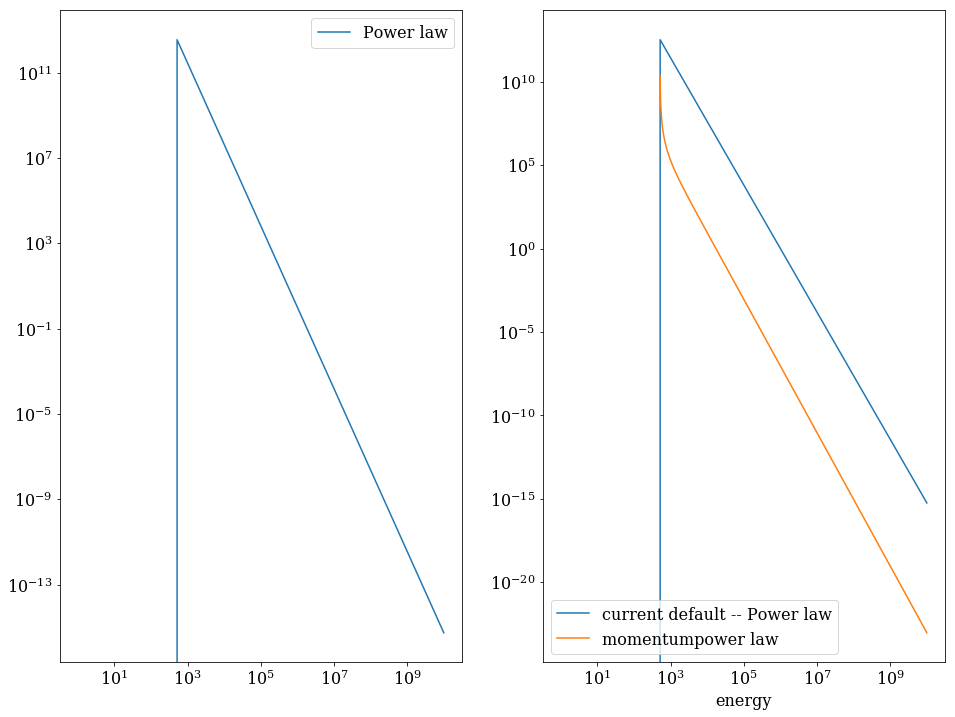

In [15]:
energy=np.logspace(0,10,1000)*u.keV

plt.figure(figsize = (15,12))
plt.subplot(121)
g, h = get_cre1_powerlaw(energy)
plt.loglog(g,h, label = 'Power law')
plt.legend()

plt.subplot(122)
g, h = clust.get_normed_cre1_spectrum(energy)
plt.loglog(g,h, label = 'current default -- Power law')
c, d = get_cre1_momentumpowerlaw(energy)
plt.loglog(c,d,label = 'momentumpower law')
plt.xlabel('energy')
plt.legend()

## Compare

Getting the cosmic ray primary electron spectrum parameters value
Getting the cosmic ray primary electron spectrum parameters value


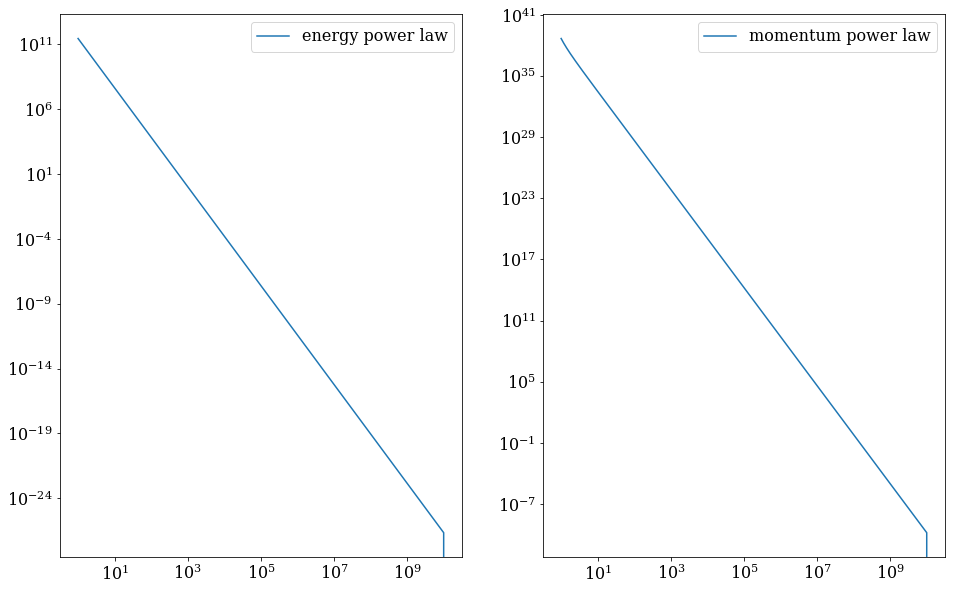

In [16]:
plt.figure(figsize = (15,10))

energy=np.logspace(0,10,1000)*u.MeV



plt.subplot(121)
clust.spectrum_cre1_model['name']='PowerLaw'
g, h = clust.get_normed_cre1_spectrum(energy)
plt.loglog(g,h, label = 'energy power law')
plt.legend()

plt.subplot(122)
clust.spectrum_cre1_model['name']='MomentumPowerLaw'
g, h = clust.get_normed_cre1_spectrum(energy)
plt.loglog(g,h, label = 'momentum power law')
plt.legend()

## Check units

In [9]:
clust.spectrum_cre1_model['name']='PowerLaw'
g, f = clust.get_normed_cre1_spectrum()
type(f)

Getting the cosmic ray primary electron spectrum parameters value


astropy.units.quantity.Quantity

In [10]:
clust.spectrum_cre1_model['name']='MomentumPowerLaw'
g, h = clust.get_normed_cre1_spectrum()
type(h)

Getting the cosmic ray primary electron spectrum parameters value


astropy.units.quantity.Quantity

In [11]:
f.unit

Unit("adu")

In [12]:
h.unit

Unit("adu")

In [13]:
g, o = get_cre1_powerlaw(energy)
o.unit

Getting the cosmic ray primary electron spectrum parameters value
Getting the cosmic ray primary electron spectrum parameters value


Unit("adu")

In [ ]:
f